In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/README-images.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/trainclasses.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicate-matrix-continuous.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicate-matrix-binary.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/README-attributes.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicate-matrix.png
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/predicates.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/testclasses.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/classes.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/licenses/fox/fox_10525.txt
/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/licenses/fox/fox_10049.txt
/kaggle/input/animals-with-attributes-2/Animals_wi

Veri Seti Hazırlığı
Bu adımda, projede kullanılacak hayvan sınıflarını belirleyip, yalnızca bu sınıflara ait görselleri seçerek veriyi hazırlıyoruz. Bu verileri, eğitim ve test setlerine ayırarak modelin eğitimi için kullanılabilir hale getiriyoruz.

İlk olarak, hedeflediğimiz 10 hayvan sınıfını tanımlıyoruz: collie, dolphin, elephant, fox, moose, rabbit, sheep, squirrel, giant panda, polar bear. Bu sınıflara ait veriler, proje için gerekli olan veri setinin temelini oluşturacak.

Görsellerin bulunduğu klasörden yalnızca bu hayvan sınıflarına ait olanları seçiyoruz ve her sınıftan yalnızca 650 görsel kullanıyoruz. Bu, veri setimizin dengeli olmasını ve her sınıftan yeterli sayıda örnekle modelimizi eğitmeyi sağlar.

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Hedef hayvan listesi
target_animals = ["collie", "dolphin", "elephant", "fox", 
                  "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

# Veri setinin bulunduğu ana klasör
input_dir = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"
output_dir = "/kaggle/working/prepared_data"  # Hazırlanan veriyi kaydetmek için hedef klasör

# Çıkış klasörlerini oluştur
os.makedirs(output_dir, exist_ok=True)
os.makedirs(f"{output_dir}/train", exist_ok=True)
os.makedirs(f"{output_dir}/test", exist_ok=True)

image_limit = 650

### Hayvan Başına Veriyi Filtreleyip Organize Etme
Bu adımda, belirlediğimiz 10 hayvan sınıfı için görselleri filtreleyip, eğitim ve test setlerine ayırıyoruz.

1. **Hayvan Başına Klasör Kontrolü ve Filtreleme**:
   - `target_animals` listesinde belirtilen her bir hayvan için, ilgili hayvanın görsellerinin bulunduğu klasör `animal_dir` ile belirtiliyor. 
   - Eğer bu klasör mevcut değilse, bir hata mesajı verilip, o hayvan sınıfı için işlem atlanıyor.

2. **Görsellerin Seçimi**:
   - İlgili hayvanın klasöründen ilk 650 görsel seçiliyor. Bu sayede her sınıfın dengeli bir şekilde temsil edilmesini sağlıyoruz.

3. **Eğitim ve Test Setlerine Ayırma**:
   - Seçilen görseller, `train_test_split` fonksiyonu ile %70 eğitim ve %30 test olarak ikiye ayrılıyor. Bu işlemde `random_state` parametresi ile aynı verilerin her çalıştırmada seçilmesi sağlanıyor.

4. **Görsellerin Kopyalanması**:
   - Eğitim ve test setlerine ait görseller, sırasıyla `train` ve `test` klasörlerinde uygun alt klasörlere (hayvan adıyla) kopyalanıyor.

In [3]:
# Hayvan başına veriyi filtreleyip organize et
for animal in target_animals:
    animal_dir = os.path.join(input_dir, animal)
    
    # İlgili hayvanın klasörünü kontrol et
    if not os.path.exists(animal_dir):
        print(f"Klasör bulunamadı: {animal_dir}")
        continue
    
    # Hayvan klasöründen ilk 300 görseli seç
    all_images = sorted(os.listdir(animal_dir))[:image_limit]
    
    # Seçilen görselleri eğitim ve test setine ayır
    train_images, test_images = train_test_split(all_images, test_size=0.3, random_state=42)
    
    # Görselleri ilgili klasörlere kopyala
    for image_set, set_name in zip([train_images, test_images], ["train", "test"]):
        target_dir = os.path.join(output_dir, set_name, animal)
        os.makedirs(target_dir, exist_ok=True)
        
        for image in image_set:
            src = os.path.join(animal_dir, image)
            dst = os.path.join(target_dir, image)
            shutil.copy(src, dst)
    
    print(f"{animal}: {len(train_images)} eğitim, {len(test_images)} test görseli seçildi.")

collie: 455 eğitim, 195 test görseli seçildi.
dolphin: 455 eğitim, 195 test görseli seçildi.
elephant: 455 eğitim, 195 test görseli seçildi.
fox: 455 eğitim, 195 test görseli seçildi.
moose: 455 eğitim, 195 test görseli seçildi.
rabbit: 455 eğitim, 195 test görseli seçildi.
sheep: 455 eğitim, 195 test görseli seçildi.
squirrel: 455 eğitim, 195 test görseli seçildi.
giant+panda: 455 eğitim, 195 test görseli seçildi.
polar+bear: 455 eğitim, 195 test görseli seçildi.


### Veri Yükleme ve Veri Artırma

Bu adımda, eğitim ve test veri setlerini hazırlamak için TensorFlow'un `ImageDataGenerator` sınıfını kullanıyoruz. Bu sınıf, görselleri önceden işleyerek (normalizasyon ve veri artırma gibi) modelin eğitiminde kullanıma hazır hale getirir.

1. **Görsellerin Yüklenmesi**:
   - Eğitim ve test veri setleri için uygun dosya yolları (`train_dir` ve `test_dir`) belirlenir.
   - Görseller, 128x128 boyutlarına yeniden boyutlandırılır ve her iki veri seti için de `ImageDataGenerator` kullanılarak görseller normalize edilir (`rescale=1.0/255.0`).

2. **Veri Artırma**:
   - Eğitim veri seti için sadece normalizasyon yapılırken, test veri seti için de aynı işlem uygulanır. Bu sayede, eğitim sırasında modelin daha genel bir özellik öğrenmesi sağlanır.

3. **Veri Generatorları**:
   - `flow_from_directory` fonksiyonu, belirlenen veri seti klasörlerinden (eğitim ve test) verileri yükler ve bunları `train_generator` ve `test_generator` üzerinden modele besleyebileceğimiz şekilde işler.
   - Her iki veri seti için `batch_size` 32 olarak belirlenir ve `class_mode='categorical'` parametresi, çok sınıflı sınıflandırma için çıktıların etiketlerini kategorik hale getirir.

4. **Sınıf Sayısının Alınması**:
   - Eğitim veri setindeki sınıfların sayısı, `train_generator.class_indices` kullanılarak belirlenir ve bu sayı ekrana yazdırılır.

Bu adımda amaç, veriyi modele besleyebilmek için uygun hale getirmek ve sınıfların sayısını doğrulamaktır.

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri seti yolları
train_dir = f"{output_dir}/train"
test_dir = f"{output_dir}/test"

# Görsel boyutu ve batch size
image_size = (128, 128)  # Görselleri 128x128 boyutunda yeniden boyutlandıracağız
batch_size = 32

# Veri artırma ve veri yükleme
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Görselleri normalize et
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Sınıf sayısını almak için
num_classes = len(train_generator.class_indices)
print(f"Sınıf Sayısı: {num_classes}")

Found 4550 images belonging to 10 classes.
Found 1950 images belonging to 10 classes.
Sınıf Sayısı: 10


### CNN Modeli Tasarımı

Bu adımda, verilen veri seti ile sınıflandırma yapacak bir **Konvolüsyonel Sinir Ağı (CNN)** modeli oluşturuluyor. Model, üç temel katmandan oluşan bir yapı kullanır: konvolüsyonel katmanlar, havuzlama katmanları ve tamamen bağlı (fully connected) katmanlar.

1. **Konvolüsyonel Katmanlar (Conv2D)**:
   - Modelin ilk katmanı, 32 filtre ve 3x3 boyutlarında çekirdeklerle çalışarak, giriş görüntüsündeki özellikleri çıkarmaya başlar. Aktivasyon fonksiyonu olarak `ReLU` (Rectified Linear Unit) kullanılır.
   - Ardından, 64 filtre ile ikinci bir konvolüsyonel katman eklenir ve bunun ardında yine bir havuzlama katmanı (MaxPooling2D) yer alır.
   - Son olarak, 128 filtreli bir konvolüsyon katmanı eklenir ve bu katman da MaxPooling ile takip edilir.

2. **Havuzlama Katmanları (MaxPooling2D)**:
   - Konvolüsyonel katmanlar tarafından çıkarılan özelliklerin boyutunu küçültmek ve daha soyut özellikler elde etmek için `MaxPooling2D` katmanları kullanılır. Bu, modelin daha verimli çalışmasını sağlar.

3. **Flatten ve Fully Connected Katmanlar**:
   - Son konvolüsyonel katmandan elde edilen özellik haritası, `Flatten()` fonksiyonu ile düzleştirilir. Bu işlem, 2D veriyi 1D vektöre dönüştürür.
   - Ardından, 128 nöronlu bir `Dense` katmanı eklenir ve `ReLU` aktivasyon fonksiyonu kullanılır.
   - Modelin son katmanı, sınıflandırma için `num_classes` kadar çıkış nöronuna sahip olup, `softmax` aktivasyon fonksiyonu ile çalışır. Bu, çoklu sınıf sınıflandırması için uygun bir çıkış katmanıdır.

4. **Modelin Derlenmesi**:
   - Model, `adam` optimizasyon algoritması ile derlenir ve kayıp fonksiyonu olarak `categorical_crossentropy` seçilir. Bu, çok sınıflı sınıflandırma problemleri için yaygın olarak kullanılan bir kayıp fonksiyonudur.
   - Modelin doğruluk (`accuracy`) metriği izlenir.

Modelin özetini almak için `model.summary()` fonksiyonu kullanılır, bu da modelin katmanları ve parametreleri hakkında detaylı bilgi sağlar.

In [5]:
# CNN Modeli
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Çıkış katmanı
])

# Modeli Derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Modelin Eğitilmesi

Bu adımda, daha önce tasarlanan CNN modelini eğitim verisi ile eğitiyoruz. Eğitimi gerçekleştirmek için aşağıdaki işlemler yapılır:

1. **Epoch Sayısı**:
   - Modelin eğitimi 10 epoch boyunca yapılacaktır. Bir epoch, modelin tüm eğitim verisi üzerinde bir tam geçiş yapması anlamına gelir. Bu sayede model, verilerden daha fazla özellik öğrenir.

2. **Modeli Eğitme**:
   - `model.fit()` fonksiyonu ile model, eğitim verileri (`train_generator`) ve doğrulama verileri (`test_generator`) ile eğitilir.
   - Eğitim sırasında, model her epoch sonunda doğrulama setindeki başarıyı değerlendirir. Bu, modelin genel başarısını izlemek için kullanılır.
   - Eğitim süreci, `verbose=1` parametresi ile çıktı olarak ekrana yazdırılır, böylece her epoch'un sonunda eğitim sürecinin durumu hakkında bilgi edinilebilir.

3. **Sonuçların Kaydedilmesi**:
   - Eğitim süreci sonunda, modelin her epoch'taki doğruluk ve kayıp değerleri, `history` değişkeninde saklanır. Bu, ilerleyen aşamalarda eğitim performansının analiz edilmesi için kullanılacaktır.

In [6]:
epochs = 10  # epoch sayısı

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 131s 883ms/step - accuracy: 0.1957 - loss: 2.1665 - val_accuracy: 0.4113 - val_loss: 1.7199
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 127s 786ms/step - accuracy: 0.3937 - loss: 1.7171 - val_accuracy: 0.4092 - val_loss: 1.6210
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 160s 911ms/step - accuracy: 0.4285 - loss: 1.5869 - val_accuracy: 0.5379 - val_loss: 1.3599
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 125s 789ms/step - accuracy: 0.5477 - loss: 1.2877 - val_accuracy: 0.5626 - val_loss: 1.3048
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 126s 867ms/step - accuracy: 0.5939 - loss: 1.1593 - val_accuracy: 0.5656 - val_loss: 1.2569
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 790ms/step - accuracy: 0.6423 - loss: 1.0295 - val_accuracy: 0.5841 - val_loss: 1.2370
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 114s 784ms/step - accuracy: 0.6880 - loss: 0.8810 - val_accuracy: 0.5944 - val_loss: 1.2115
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 113s 779ms/step - accuracy: 0.7348 - loss: 0.76

### Modeli Kaydetme ve Eğitim Sonuçlarını Görselleştirme

Bu adımda, eğitilen model kaydedilir ve eğitim sürecinin sonuçları görselleştirilir.

1. **Modeli Kaydetme**:
   - Eğitilen model, `model.save()` fonksiyonu ile belirtilen dizine (`cnn_animal_classifier.h5`) kaydedilir. Bu dosya, modelin tüm yapılandırmasını, ağırlıklarını ve parametrelerini içerir. Kaydedilen model daha sonra tekrar yüklenip kullanılabilir.
   - Model kaydedildikten sonra, `"Model kaydedildi!"` mesajı ekrana yazdırılır.

2. **Eğitim Sonuçlarını Görselleştirme**:
   - Modelin eğitim süreci sırasında elde edilen doğruluk (accuracy) değerleri görselleştirilir. `history.history['accuracy']` eğitim doğruluğu ve `history.history['val_accuracy']` doğrulama doğruluğu grafik üzerinde çizilir.
   - Grafik, her epoch için eğitim ve doğrulama doğruluğunun nasıl değiştiğini gösterir. Bu, modelin ne kadar iyi öğrendiğini ve overfitting (aşırı uyum) olup olmadığını analiz etmeye yardımcı olur.
   - Grafik başlığı, eksen etiketleri ve bir açıklama (legend) eklenir, böylece sonuçların daha anlaşılır olması sağlanır.

Model kaydedildi!


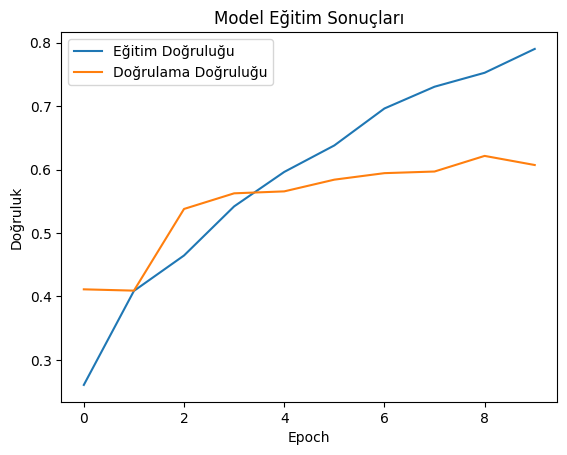

In [7]:
import matplotlib.pyplot as plt

# Modeli Kaydet
model.save(f"{output_dir}/cnn_animal_classifier.h5")
print("Model kaydedildi!")

# Eğitim sonuçlarını görselleştir
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Eğitim Sonuçları')
plt.show()

### Test Doğruluğunu Değerlendirme

Bu adımda, eğitilen modelin test verisi üzerindeki doğruluğu (accuracy) değerlendirilir.

1. **Modeli Test Etme**:
   - `model.evaluate()` fonksiyonu, eğitim sırasında kullanılmayan test verisi (`test_generator`) üzerinde modelin performansını değerlendirir. Bu işlem, test setindeki kayıp (loss) ve doğruluk (accuracy) gibi metriği hesaplar.
   - Test doğruluğu, modelin genel başarısını değerlendirmek için önemli bir ölçüttür. Eğitim doğruluğu yüksek olsa da, model test verisinde iyi performans göstermiyorsa overfitting (aşırı uyum) olabileceği anlamına gelir.

2. **Sonuçların Yazdırılması**:
   - Modelin test doğruluğu, `test_accuracy` değişkeninden elde edilir ve yüzde formatında ekrana yazdırılır. Bu, modelin test verisi üzerinde ne kadar doğru sınıflandırma yaptığına dair bilgi verir.

In [8]:
# Test doğruluğu
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 397ms/step - accuracy: 0.5961 - loss: 1.3604
Test Doğruluğu: 60.72%


### Rastgele Test Görseli Üzerinde Model Tahmini

Bu adımda, test veri setinden rastgele bir görsel seçilir ve modelin bu görsel üzerindeki tahmini yapılır.

1. **Rastgele Görsel Seçimi**:
   - Test veri setinden rastgele bir sınıf seçilir ve bu sınıftan rastgele bir görsel seçilir. `random.choice()` fonksiyonu kullanılarak, test veri setindeki sınıflardan ve görsellerden rastgele seçim yapılır.

2. **Görselin İşlenmesi**:
   - Seçilen görsel, modelin kabul ettiği boyutta (`image_size`) yüklenir ve ardından numpy dizisine (`img_to_array`) dönüştürülür. Modelin giriş katmanı için uygun boyutta olması gerektiğinden, görüntüye `np.expand_dims()` fonksiyonu ile batch boyutu eklenir. 
   - Görüntü, modelin eğitiminde kullanılan normalizasyon işlemi için `image_array / 255.0` ile normalize edilir.

3. **Model Tahmini**:
   - Görsel, modelin tahmin fonksiyonu olan `model.predict()` ile işlenir ve modelin hangi sınıfa ait olduğunu tahmin etmesi sağlanır. Tahmin edilen sınıf, `class_labels` listesi kullanılarak bulunur.

4. **Sonuçların Görselleştirilmesi**:
   - Seçilen görsel `plt.imshow()` ile görselleştirilir. Görselin başlığında tahmin edilen sınıf ve gerçek sınıf bilgisi belirtilir. Başlık, modelin tahminini ve gerçekte ait olduğu sınıfı karşılaştırarak kullanıcıya sunar.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


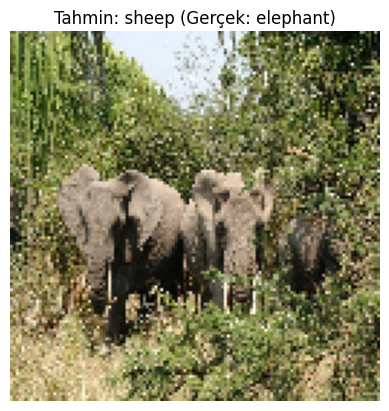

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Test veri setindeki sınıf adlarını al
class_labels = list(test_generator.class_indices.keys())

# Test veri setinden rastgele bir resim seç
test_images_dir = test_dir  # Test veri setinin yolu
random_class = random.choice(os.listdir(test_images_dir))  # Rastgele bir sınıf seç
random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_class)))  # Sınıftan rastgele bir resim seç

# Seçilen resmin tam dosya yolu
image_path = os.path.join(test_images_dir, random_class, random_image)

# Görüntüyü yükle ve modele uygun şekilde işle
image = load_img(image_path, target_size=image_size)  # Görüntüyü modele uygun boyuta getir
image_array = img_to_array(image)  # Görüntüyü array'e çevir
image_array = np.expand_dims(image_array, axis=0)  # Model için batch boyutu ekle
image_array = image_array / 255.0  # Normalizasyon

# Model tahmini yap
prediction = model.predict(image_array)
predicted_class = class_labels[np.argmax(prediction)]  # Tahmin edilen sınıf

# Görüntüyü ve tahmini görselleştir
plt.imshow(image)
plt.axis('off')
plt.title(f"Tahmin: {predicted_class} (Gerçek: {random_class})")
plt.show()

### Farklı Işık Koşulları ile Test Resimlerinin Manipülasyonu

Bu adımda, test veri setindeki resimler farklı parlaklık seviyeleriyle manipüle edilmiştir. Bu, modelin ışık koşullarına karşı dayanıklılığını test etmek için yapılmaktadır.

1. **Manipülasyon Fonksiyonu**:
   - `get_manipulated_images()` fonksiyonu, verilen bir dizindeki tüm resimleri alır ve parlaklık seviyelerini değiştirir. Parlaklık faktörleri listesi (`brightness_factors`) kullanılarak resimlere farklı parlaklıklar uygulanır.
   - Fonksiyon, her bir resim için belirtilen parlaklık faktörlerine göre resimleri manipüle eder. `ImageEnhance.Brightness()` fonksiyonu kullanılarak her bir görselin parlaklığı ayarlanır.

2. **Klasör Yapısı**:
   - Manipüle edilmiş resimler için, orijinal sınıf isimlerine göre alt klasörler oluşturulur. Her sınıf için manipüle edilmiş resimler bu alt klasörlere kaydedilir.

3. **Resimlerin Manipüle Edilmesi**:
   - Resimler, belirtilen parlaklık faktörlerine göre manipüle edilip kaydedilir. Parlaklık faktörleri genellikle `0.5` (daha koyu), `1.0` (orijinal parlaklık) ve `1.5` (daha parlak) gibi değerler alır. Manipüle edilmiş resimler, orijinal dosya adının sonuna `_brightness_{factor}` etiketi eklenerek kaydedilir.

4. **Manipüle Edilmiş Resimlerin Kaydedilmesi**:
   - Manipüle edilen tüm resimler, belirtilen çıktı dizinine (`manipulated_test_dir`) kaydedilir. Bu, modelin parlaklık değişimlerine karşı nasıl performans gösterdiğini test etmemize olanak tanır.

Bu adım, modelin ışık koşullarındaki değişikliklere ne kadar dayanıklı olduğunu görmek için önemlidir.

In [10]:
from PIL import Image, ImageEnhance
import os

# Farklı ışık koşulları yaratmak için fonksiyon
def get_manipulated_images(input_dir, output_dir, brightness_factors=[0.5, 1.5]):
    """
    Resimleri farklı parlaklık seviyeleriyle manipüle eder.
    input_dir: Orijinal test resimlerinin olduğu klasör.
    output_dir: Manipüle edilmiş resimlerin kaydedileceği klasör.
    brightness_factors: Parlaklık seviyelerini belirler.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Her sınıf için manipüle edilmiş klasör oluştur
        manipulated_class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(manipulated_class_dir):
            os.makedirs(manipulated_class_dir)

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            with Image.open(image_path) as img:
                for factor in brightness_factors:
                    enhancer = ImageEnhance.Brightness(img)
                    manipulated_image = enhancer.enhance(factor)
                    
                    # Manipüle edilmiş görüntüyü kaydet
                    manipulated_image_name = f"{os.path.splitext(image_name)[0]}_brightness_{factor}.jpg"
                    manipulated_image.save(os.path.join(manipulated_class_dir, manipulated_image_name))

# Test resimlerinin manipüle edilmesi
manipulated_test_dir = "/kaggle/working/manipulated_test_set"
get_manipulated_images(test_dir, manipulated_test_dir, brightness_factors=[0.5, 1.0, 1.5])

print(f"Manipüle edilmiş resimler {manipulated_test_dir} dizinine kaydedildi.")

Manipüle edilmiş resimler /kaggle/working/manipulated_test_set dizinine kaydedildi.


## Manipüle edilmiş resimlerden rastgele seçip modeli test edelim

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


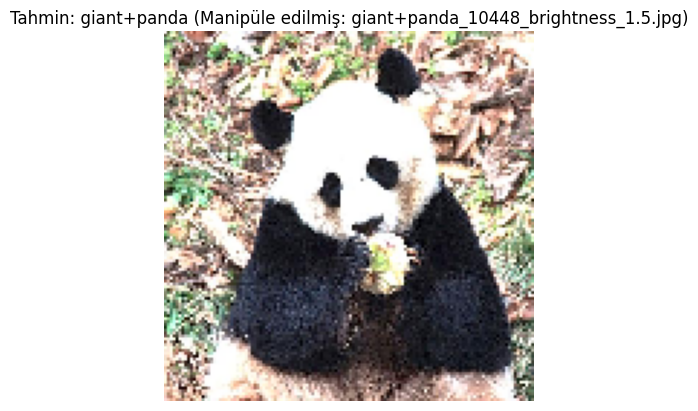

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image, ImageEnhance
import os

# Manipüle edilmiş test veri setindeki sınıf adlarını al
class_labels = list(test_generator.class_indices.keys())

# Manipüle edilmiş test veri setinden rastgele bir resim seç
manipulated_test_images_dir = manipulated_test_dir  # Manipüle edilmiş test veri setinin yolu
random_class = random.choice(os.listdir(manipulated_test_images_dir))  # Rastgele bir sınıf seç
random_image = random.choice(os.listdir(os.path.join(manipulated_test_images_dir, random_class)))  # Sınıftan rastgele bir resim seç

# Seçilen resmin tam dosya yolu
image_path = os.path.join(manipulated_test_images_dir, random_class, random_image)

# Görüntüyü yükle ve modele uygun şekilde işle
image = load_img(image_path, target_size=image_size)  # Görüntüyü modele uygun boyuta getir
image_array = img_to_array(image)  # Görüntüyü array'e çevir
image_array = np.expand_dims(image_array, axis=0)  # Model için batch boyutu ekle
image_array = image_array / 255.0  # Normalizasyon

# Model tahmini yap
prediction = model.predict(image_array)
predicted_class = class_labels[np.argmax(prediction)]  # Tahmin edilen sınıf

# Görüntüyü ve tahmini görselleştir
plt.imshow(image)
plt.axis('off')
plt.title(f"Tahmin: {predicted_class} (Manipüle edilmiş: {random_image})")
plt.show()

Bu adımda, manipüle edilmiş test seti ile modelin doğruluğu değerlendirilir.

- **ImageDataGenerator** ile test seti yüklenmiş ve manipüle edilmiş görüntüler 128x128 boyutuna getirilip normalize edilmiştir.
- **Model değerlendirme** için `model.evaluate()` fonksiyonu kullanılmış ve doğruluk sonucu yazdırılmıştır.

Sonuç, modelin ışık değişimlerine karşı gösterdiği performansı gösterir.

In [12]:
# Manipüle edilmiş test seti için ImageDataGenerator
manipulated_test_datagen = ImageDataGenerator(rescale=1.0/255.0)
manipulated_test_generator = manipulated_test_datagen.flow_from_directory(
    manipulated_test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Manipüle edilmiş test setinde modeli değerlendirme
manipulated_test_loss, manipulated_test_accuracy = model.evaluate(manipulated_test_generator, verbose=1)

print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_test_accuracy * 100:.2f}%")


Found 5850 images belonging to 10 classes.
183/183 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.5780 - loss: 1.4954
Manipüle Edilmiş Test Seti Doğruluğu: 57.16%


**Gray World** algoritması kullanılarak manipüle edilmiş test setine renk sabitliği uygulanır.

1. **Gray World algoritması**: Görüntüdeki her bir renk kanalının ortalama değerini hesaplayarak, tüm kanalları aynı ortalama değere getirmek için renkleri dengeler.
2. **`get_wb_images` fonksiyonu**: Manipüle edilmiş test setindeki her bir resme Gray World algoritmasını uygulayıp, renk sabitliği sağlanmış yeni resimleri belirtilen dizine kaydeder.

Sonuç olarak, manipüle edilmiş test setine renk sabitliği uygulanmış ve **wb_test_set** dizinine kaydedilmiştir.

In [13]:
import cv2
import numpy as np

# Gray World algoritmasını uygulayan fonksiyon
def apply_gray_world(image):
    """
    Gray World algoritması: Renk sabitliği sağlamak için RGB kanallarını dengeler.
    """
    img = np.asarray(image, dtype=np.float32)
    mean_r = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_b = np.mean(img[:, :, 2])

    mean_gray = (mean_r + mean_g + mean_b) / 3

    img[:, :, 0] = np.minimum(img[:, :, 0] * (mean_gray / mean_r), 255)
    img[:, :, 1] = np.minimum(img[:, :, 1] * (mean_gray / mean_g), 255)
    img[:, :, 2] = np.minimum(img[:, :, 2] * (mean_gray / mean_b), 255)

    return img.astype(np.uint8)

# Manipüle edilmiş test setine renk sabitliği uygulayan fonksiyon
def get_wb_images(input_dir, output_dir):
    """
    Manipüle edilmiş test setine renk sabitliği uygular ve kaydeder.
    input_dir: Manipüle edilmiş test seti dizini.
    output_dir: Renk sabitliği uygulanmış test seti için hedef dizin.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Her sınıf için renk sabitliği uygulanmış klasör oluştur
        wb_class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(wb_class_dir):
            os.makedirs(wb_class_dir)

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                wb_image = apply_gray_world(img_array)
                wb_image_pil = Image.fromarray(wb_image)

                # Renk sabitliği uygulanmış görüntüyü kaydet
                wb_image_name = f"{os.path.splitext(image_name)[0]}_wb.jpg"
                wb_image_pil.save(os.path.join(wb_class_dir, wb_image_name))

# Manipüle edilmiş test setine renk sabitliği uygulama
wb_test_dir = "/kaggle/working/wb_test_set"
get_wb_images(manipulated_test_dir, wb_test_dir)

print(f"Renk sabitliği uygulanmış resimler {wb_test_dir} dizinine kaydedildi.")


Renk sabitliği uygulanmış resimler /kaggle/working/wb_test_set dizinine kaydedildi.


### Renk Sabitliği Uygulanmış Test Resimleri ile Modelin Değerlendirilmesi

Bu adımda, renk sabitliği sağlamak için **Gray World algoritması** uygulanarak manipüle edilen test resimleri kullanılmıştır. Modelin, renk sapmalarına karşı dayanıklılığını test etmek için renk sabitliği manipülasyonu yapılmıştır.

1. **Gray World Algoritması**:
   - **Gray World algoritması**, RGB (kırmızı, yeşil, mavi) kanallarının ortalamalarını kullanarak renk dengesini sağlar. Algoritma, her bir kanalın ortalama değerini hesaplar ve bu değeri, tüm kanallarda aynı hale getirecek şekilde görüntüdeki her pikselin değerini değiştirir.
   - Bu işlem, genellikle renk bozulmalarını düzeltmek ve görüntülerin daha doğal görünmesini sağlamak amacıyla yapılır.

2. **Manipülasyon Fonksiyonu**:
   - `get_wb_images()` fonksiyonu, verilen test setindeki tüm resimleri alır ve her birine **Gray World algoritması** uygular. Bu işlem, tüm test setine uygulanır ve renk sabitliği sağlanmış yeni görseller oluşturulur.
   - Fonksiyon, her bir resmin `apply_gray_world()` fonksiyonu ile işlenmesini sağlar.

3. **Klasör Yapısı**:
   - Manipüle edilmiş resimler, her bir sınıf için ayrı alt klasörlere kaydedilir. Orijinal test setindeki sınıf yapısına uygun şekilde, her sınıfın alt klasöründe renk sabitliği uygulanmış görseller depolanır.

4. **Renk Sabitliği Uygulama ve Kaydetme**:
   - Her bir test resmi için renk sabitliği uygulanır ve görseller, `wb_test_dir` dizinine kaydedilir. Resimler, orijinal dosya adlarının sonuna `_wb` etiketi eklenerek saklanır.
   - Bu işlem, modelin renk sapmalarına karşı nasıl performans gösterdiğini değerlendirmek için yapılır.

5. **Değerlendirme**:
   - Renk sabitliği uygulanmış test seti üzerinde, modelin performansı **ImageDataGenerator** kullanılarak test edilir. Test seti için modelin kayıp (loss) ve doğruluk (accuracy) değerleri hesaplanır.
   - `evaluate()` fonksiyonu ile modelin renk sabitliği sağlanmış test setindeki başarımı ölçülür.

In [14]:
# Renk sabitliği uygulanmış test seti için ImageDataGenerator
wb_test_datagen = ImageDataGenerator(rescale=1.0/255.0)
wb_test_generator = wb_test_datagen.flow_from_directory(
    wb_test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Modeli renk sabitliği uygulanmış test seti üzerinde değerlendirme
wb_test_loss, wb_test_accuracy = model.evaluate(wb_test_generator, verbose=1)

print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {wb_test_accuracy * 100:.2f}%")

Found 5850 images belonging to 10 classes.
183/183 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.5022 - loss: 1.7345
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 50.67%



Test Setlerinin Başarıları:

                             Test Seti  Doğruluk (%)     Kayıp
0                   Orijinal Test Seti     60.717946  1.357136
1           Manipüle Edilmiş Test Seti     57.162392  1.466242
2  Renk Sabitliği Uygulanmış Test Seti     50.666666  1.669144


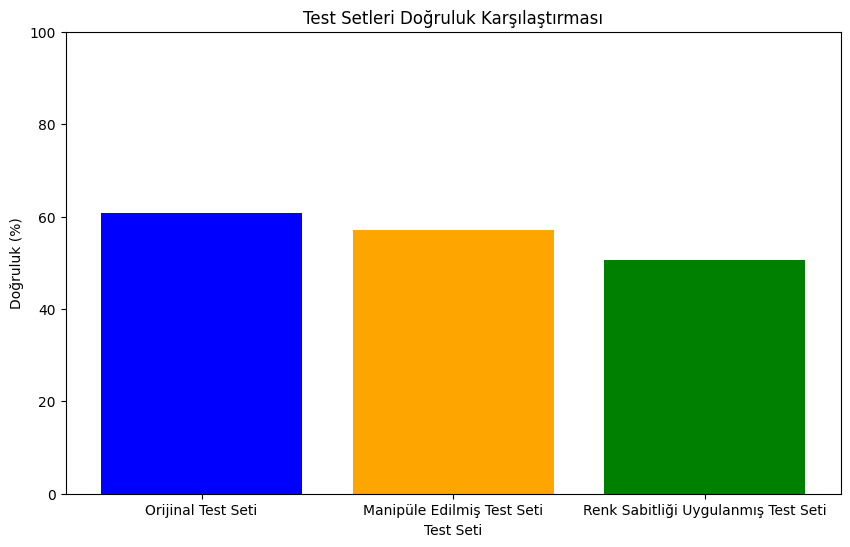

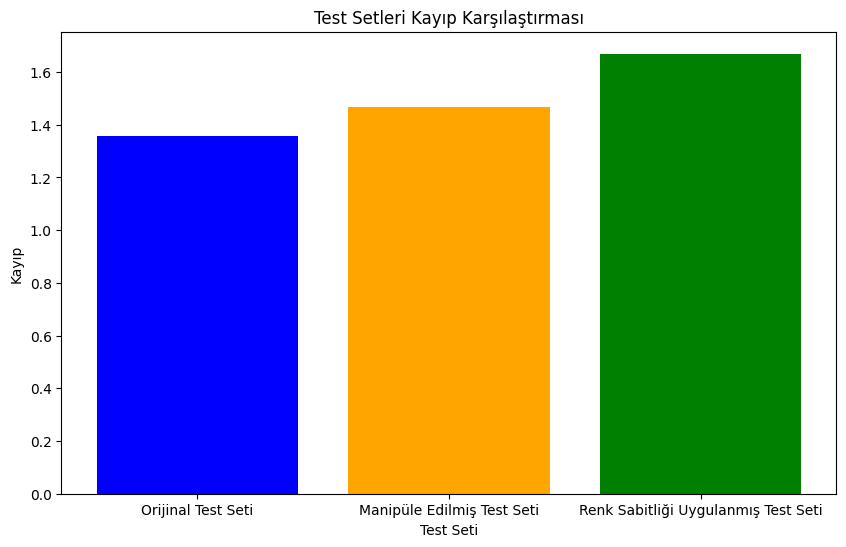

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Test setlerine ait doğruluk skorları ve kayıplar
results = {
    "Test Seti": ["Orijinal Test Seti", "Manipüle Edilmiş Test Seti", "Renk Sabitliği Uygulanmış Test Seti"],
    "Doğruluk (%)": [test_accuracy * 100, manipulated_test_accuracy * 100, wb_test_accuracy * 100],
    "Kayıp": [test_loss, manipulated_test_loss, wb_test_loss]
}

# Sonuçları tablo olarak göster
results_df = pd.DataFrame(results)
print("\nTest Setlerinin Başarıları:\n")
print(results_df)

# Başarı oranlarının grafiksel gösterimi
plt.figure(figsize=(10, 6))
plt.bar(results["Test Seti"], results["Doğruluk (%)"], color=['blue', 'orange', 'green'])
plt.title("Test Setleri Doğruluk Karşılaştırması")
plt.xlabel("Test Seti")
plt.ylabel("Doğruluk (%)")
plt.ylim(0, 100)
plt.show()

# Kayıpların grafiksel gösterimi
plt.figure(figsize=(10, 6))
plt.bar(results["Test Seti"], results["Kayıp"], color=['blue', 'orange', 'green'])
plt.title("Test Setleri Kayıp Karşılaştırması")
plt.xlabel("Test Seti")
plt.ylabel("Kayıp")
plt.show()

# CNN Modeli Performans Analizi ve Çözüm Önerileri

## Mevcut Durumun Analizi

Test sonuçlarımız, modelin farklı veri setleri üzerindeki performansında dikkat çekici bir düşüş eğilimi göstermektedir. Orijinal test setinde %60.71 olan başarı oranı, ışık manipülasyonları sonrasında %57.16'ya, renk sabitliği uygulaması sonrasında ise %50.66'ya gerilemiştir. Bu düşüş trendi, önemli teknik ve metodolojik çıkarımlar yapmamızı gerektirmektedir.

## Performans Düşüşünün Olası Nedenleri

1. **Renk Sabitliği Algoritmasının Etkisi**
   - Renk sabitliği algoritmasının görüntülerdeki önemli özellikleri beklenmedik şekilde değiştirmiş olması muhtemeldir
   - Algoritmanın aşırı normalizasyon yaparak ayırt edici özellikleri kaybetmiş olabileceği düşünülmektedir
   - Model eğitiminde kullanılan veriler ile işlenmiş test verileri arasında tutarsızlık oluşmuş olabilir

2. **Model Mimarisinin Dayanıklılığı**
   - Mevcut CNN modelinin ışık değişimlerine karşı yeterince dayanıklı olmadığı görülmektedir
   - Feature extraction katmanlarının çeşitli ışık koşullarında tutarlı özellikler çıkaramadığı anlaşılmaktadır

## Önerilen Çözüm Yolları

### 1. Veri Augmentasyonu Geliştirmeleri
- Eğitim setine çeşitli ışık koşullarında manipüle edilmiş görüntüler eklenmelidir
- Parlaklık, kontrast ve renk dönüşümleri içeren veri çoğaltma teknikleri uygulanmalıdır
- Random brightness ve random contrast augmentasyonları modele dahil edilmelidir

### 2. Model Mimarisi İyileştirmeleri
- Batch normalization katmanları eklenerek model dayanıklılığı artırılmalıdır
- Dropout oranları gözden geçirilmeli ve gerekirse artırılmalıdır
- Daha derin ve geniş bir mimari kullanılarak model kapasitesi artırılabilir

### 3. Renk Sabitliği Yaklaşımının Revizyonu
- Mevcut renk sabitliği algoritması yerine daha az agresif normalizasyon teknikleri denenmelidir
- Histogram eşitleme gibi alternatif görüntü ön işleme teknikleri değerlendirilmelidir
- Renk sabitliği işlemi eğitim setine de uygulanarak tutarlılık sağlanmalıdır

### 4. Ensemble Öğrenme Yaklaşımı
- Farklı ışık koşullarında eğitilmiş multiple modeller oluşturulabilir
- Bu modellerin tahminleri birleştirilerek daha gürbüz bir sistem elde edilebilir

## Sonuç

Mevcut sonuçlar, modelimizin gerçek dünya koşullarında karşılaşabileceği ışık değişimlerine karşı yeterince dayanıklı olmadığını göstermektedir. Önerilen çözüm yollarının uygulanması, modelin genelleme yeteneğini ve farklı koşullardaki performansını artırabilir. Özellikle veri augmentasyonu ve model mimarisi iyileştirmelerinin öncelikli olarak denenmesi önerilmektedir.

Bu iyileştirmeler sonrasında yeni bir değerlendirme yapılarak modelin performansındaki değişim tekrar analiz edilmelidir. 